In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

## Load the data into a DataFrame
iowa = pd.read_csv('/Users/gabrielanthonysanchez/Downloads/Iowa_Liquor_sales_sample_10pct.csv')
iowa
## Transform the dates if needed, e.g.


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [2]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [3]:
iowa["Date"] = pd.to_datetime(iowa["Date"], format="%m/%d/%Y")
iowa

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [4]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
iowa.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [7]:
#Scenario 1: State tax board

#You are a data scientist in residence at the Iowa State tax board. 
#The Iowa State legislature is considering changes in the liquor tax rates and 
#wants a report of current liquor sales by county and projections for the rest of the year.



In [8]:
# Remove redundant columns
del iowa["Category Name"]
del iowa["Item Description"]


In [9]:
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    iowa[col] = iowa[col].apply(lambda x: float(x[1:]))

In [10]:
# Drop bad values
iowa = iowa.dropna()

# Convert integers
iowa["County Number"] = iowa["County Number"].astype(int)
iowa["Category"] = iowa["Category"].astype(int)
iowa.head()

/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,Story,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [29]:
iowa.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
100716,2015-12-01,9013,Cumming,50061,91,Warren,1011100,154,27629,750,9.09,13.64,60,818.40,45.0,11.89,273.00,18.186667
89110,2016-01-20,9013,Cumming,50061,91,Warren,1031080,195,38058,1000,7.18,10.77,12,129.24,12.0,3.17,43.08,10.770000
236012,2016-03-09,9013,Cumming,50061,91,Warren,1101100,154,77284,750,6.45,9.68,24,232.32,18.0,4.76,77.52,12.906667
139261,2015-10-27,9018,Dubuque,52001,31,Dubuque,1062310,207,46686,750,14.30,21.45,300,6435.00,225.0,59.44,2145.00,28.600000
107866,2016-03-08,9023,Carroll,51401,14,Carroll,1011200,116,26996,750,17.59,26.39,24,633.36,18.0,4.76,211.20,35.186667


In [11]:
# Calculate the yearly liquor sales for each score using the provided data. 
# You can add up the transactions for each year, and store sales in 2015 
# specifically will be used later as your target variable.

In [12]:

# Margin
iowa["Margin"] = (iowa["State Bottle Retail"] - iowa["State Bottle Cost"]) * iowa["Bottles Sold"]
iowa["Price per Liter"] = iowa["Sale (Dollars)"] / iowa["Volume Sold (Liters)"]
iowa.head()


# Sales per store, 2015

# Filter by our start and end dates
iowa.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("2015/01/01")
end_date = pd.Timestamp("2015/12/31")
mask = (iowa['Date'] >= start_date) & (iowa['Date'] <= end_date)
sales = iowa[mask]

/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [13]:
# Group by County name
sales = sales.groupby(by=["County"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

In [14]:
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]

In [15]:
# Rename columns
sales.columns = [u'County', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales.head()

,County,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,Adair,STUART,43747.18,92.684703,1,15.370692,50250,3510.22,7.436907,30.976462
1,Adams,CORNING,10245.14,54.207090,2,17.324104,50841,822.28,4.350688,18.082910
2,Allamakee,WAUKON,79918.47,96.055853,3,15.460701,52172,6290.75,7.560998,32.175769
3,Appanoose,CENTERVILLE,77033.64,90.309074,4,16.414947,52544,6318.42,7.407292,30.175029
4,Audubon,AUDUBON,16429.26,86.017068,5,14.270553,50025,1448.68,7.584712,28.879529


In [16]:
# Use the data from 2015 to make a linear model using as many 
# variables as you find useful to predict the yearly sales of each store.
# You must use the sales from Jan to March per store as one of your variables.

In [31]:
# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
iowa.sort_values(by=["County", "Date"], inplace=True)
mask = (iowa['Date'] >= start_date) & (iowa['Date'] <= end_date)
iowa2 = iowa[mask].groupby(by=["County"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = iowa2["Sale (Dollars)"]


# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
iowa.sort_values(by=["County", "Date"], inplace=True)
mask = (iowa['Date'] >= start_date) & (iowa['Date'] <= end_date)
iowa2 = iowa[mask].groupby(by=["County"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Sales Q1"] = iowa2["Sale (Dollars)"]


/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/DSIenv/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
sales.head()

,County,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1
0,Adair,STUART,43747,92.684703,1,15.370692,50250,3510.22,7.436907,30.976462,10222.00,11834.16
1,Adams,CORNING,10245,54.207090,2,17.324104,50841,822.28,4.350688,18.082910,2253.60,2196.57
2,Allamakee,WAUKON,79918,96.055853,3,15.460701,52172,6290.75,7.560998,32.175769,14907.98,19106.29
3,Appanoose,CENTERVILLE,77033,90.309074,4,16.414947,52544,6318.42,7.407292,30.175029,15228.09,21493.52
4,Audubon,AUDUBON,16429,86.017068,5,14.270553,50025,1448.68,7.584712,28.879529,5510.75,3226.28


In [33]:
sales[[u'2015 Sales', u'2015 Sales mean',u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean', u'2015 Sales Q1', u'2016 Sales Q1']].corr()

,2015 Sales,2015 Sales mean,Price per Liter mean,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1
2015 Sales,1.000000,0.401494,0.481656,0.999237,0.258333,0.398185,0.998968,0.998588
2015 Sales mean,0.401494,1.000000,0.443373,0.404865,0.935976,0.999948,0.400640,0.405491
Price per Liter mean,0.481656,0.443373,1.000000,0.484958,0.214306,0.440377,0.484603,0.483735
2015 Volume Sold (Liters),0.999237,0.404865,0.484958,1.000000,0.265037,0.401599,0.999195,0.997662
2015 Volume Sold (Liters) mean,0.258333,0.935976,0.214306,0.265037,1.000000,0.938382,0.259149,0.258314
2015 Margin mean,0.398185,0.999948,0.440377,0.401599,0.938382,1.000000,0.397374,0.402087
2015 Sales Q1,0.998968,0.400640,0.484603,0.999195,0.259149,0.397374,1.000000,0.998121
2016 Sales Q1,0.998588,0.405491,0.483735,0.997662,0.258314,0.402087,0.998121,1.000000


In [34]:
sales = sales.dropna()

sales["2015 Sales"] = sales["2015 Sales"].astype(int)

In [35]:


sales["2015 Sales Q1"] = sales["2015 Sales Q1"].astype(int)

In [45]:
#Model


X = sales[['2015 Sales Q1']]
y = sales['2015 Sales']

lm = linear_model.LinearRegression()
lm.fit(X, y)
predictions = lm.predict(X)
print "Model:", lm.score(X, y)
print lm.coef_[0], lm.intercept_

Model: 0.997936910839
4.75348491779 -7438.60551999


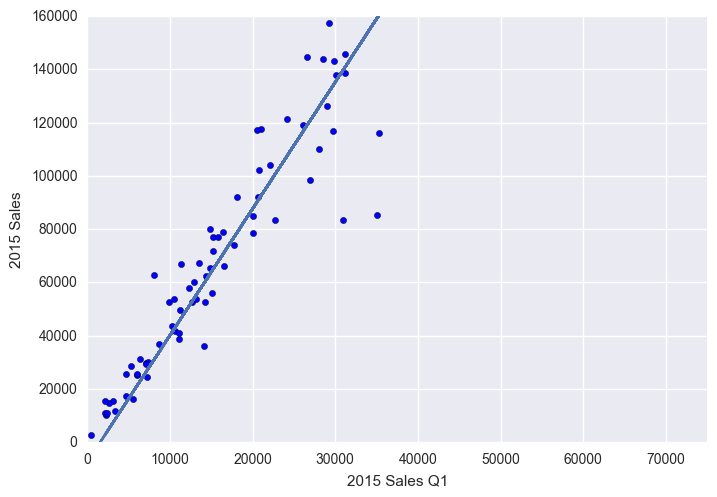

In [37]:
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlim(0, 75000)
plt.xlabel('2015 Sales Q1')
plt.ylim(0, 160000)
plt.ylabel('2015 Sales')
plt.show()

In [24]:
# Use your model for 2015 to estimate total sales for each store in 2016, 
# extrapolating from the sales so far for Jan-March of 2016.


In [38]:
X = sales[["2016 Sales Q1"]]
predictions = lm.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(sales["2015 Sales"])
X2 = sales[["2015 Sales Q1"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 28504265.0
2015 actual 28504265
2016 predicted 29171569.0525


In [26]:
# Report your findings, including any projected increase or decrease in total sales 
# (over the entire state) for the tax committee of the Iowa legislature.

In [27]:
# Use cross-validation to check how your model predicts to held out data compared to 
# the model metrics on the full dataset.

r^2: 0.989689498352
4.32134992526 -7438.60551999
0.1


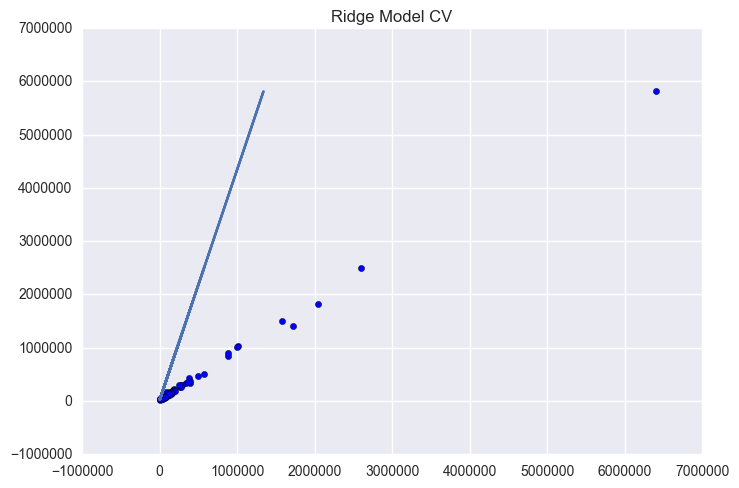

In [43]:
rlmcv = linear_model.RidgeCV(normalize=True)
X = sales[['2015 Sales Q1']]
y = sales['2015 Sales']

ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)


plt.scatter(y, predictions)
plt.plot(X, predictions)


plt.title("Ridge Model CV")

print "r^2:", ridge_model.score(X, y)
print rlmcv.coef_[0], lm.intercept_
print rlmcv.alpha_
plt.show()

